## Grid Search for Hyperparameters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
)

In [2]:
# if you want more information about the dataset for this demo:

# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

# dataset information: UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
    
# in short, classification problem, trying to predict whether the tumor
# is malignant or benign

# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# percentage of benign (0) and malign tumors (1)

y.value_counts() / len(y)

0    0.627417
1    0.372583
dtype: float64

In [4]:
# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

## Grid Search

Let's use Grid Search to find the best hyperparameters for a Gradient Boosting Classifier.

In [5]:
# set up the model
svm = SVC(random_state=0)

# determine the hyperparameter space
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [7]:
# set up the search
search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=3, refit=True, n_jobs=-1)

# find best hyperparameters
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [8]:
# the best hyperparameters are stored in an attribute

search.best_params_

{'C': 100, 'kernel': 'linear'}

In [9]:
# we also find the data for all models evaluated

results = pd.DataFrame(search.cv_results_)

print(results.shape)

results.head()

(12, 14)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.635553,0.172944,0.002470,0.000201,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.954887,0.924812,0.946970,0.942223,0.012729,3
1,3.149076,1.283380,0.001744,0.000224,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.977444,0.917293,0.954545,0.949761,0.024788,2
2,6.617936,2.288695,0.001831,0.000361,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.977444,0.909774,0.962121,0.949780,0.028971,1
3,6.209476,1.095135,0.001584,0.000365,1000,linear,NaN,"{'C': 1000, 'kernel': 'linear'}",0.977444,0.879699,0.939394,0.932179,0.040229,5
4,0.010087,0.000066,0.005079,0.000468,1,rbf,0.001,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.939850,0.909774,0.901515,0.917046,0.016473,12


In [10]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[[
    'param_C', 'param_kernel', 'param_gamma',
    'mean_test_score', 'std_test_score',
]].head()

,param_C,param_kernel,param_gamma,mean_test_score,std_test_score
0,100,linear,NaN,0.949780,0.028971
1,10,linear,NaN,0.949761,0.024788
2,1,linear,NaN,0.942223,0.012729
3,10,rbf,0.0001,0.937116,0.020053
4,1000,linear,NaN,0.932179,0.040229


In [11]:
results[[
    'param_C', 'param_kernel', 'param_gamma',
    'mean_test_score', 'std_test_score',
]].tail()

,param_C,param_kernel,param_gamma,mean_test_score,std_test_score
7,1000,rbf,0.0001,0.924584,0.010955
8,10,rbf,0.001,0.919610,0.018706
9,100,rbf,0.001,0.919610,0.018706
10,1000,rbf,0.001,0.919610,0.018706
11,1,rbf,0.001,0.917046,0.016473


Text(0.5, 0, 'Hyperparameter combinations')

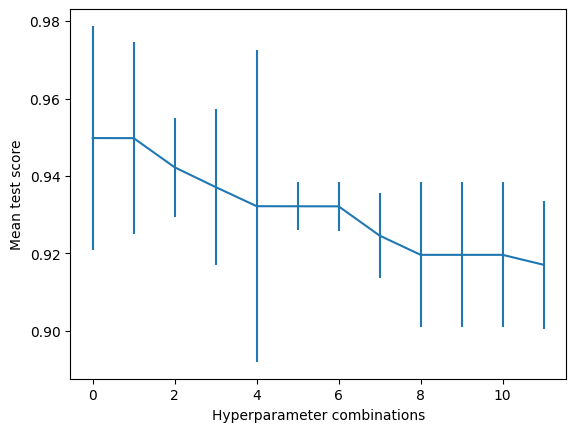

In [12]:
# plot model performance and error

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [13]:
X_train_preds = search.predict(X_train)
X_test_preds = search.predict(X_test)

print('Train accuracy_score: ', accuracy_score(y_train, X_train_preds))
print('Test accuracy_score: ', accuracy_score(y_test, X_test_preds))

Train accuracy_score:  0.9723618090452262
Test accuracy_score:  0.9649122807017544
